# 🩺 Disease Risk Prediction using Machine Learning & Deep Learning

**Submitted by:**  
- **Gurpreetkaur Jaykumar MODI**

This project develops a Disease Risk Prediction System using Machine Learning and Deep Learning techniques to classify individuals as being at low or high disease risk based on demographic, lifestyle, and physiological health factors. Key features include age, BMI, physical activity, sleep patterns, dietary habits, blood pressure, cholesterol levels, and family medical history.

The problem is formulated as a binary classification task and follows a complete data science pipeline comprising exploratory data analysis, preprocessing, feature engineering, and feature selection. Multiple machine learning models—Logistic Regression, KNN, Decision Tree, Random Forest, and SVM—are trained and systematically compared, along with a simple Artificial Neural Network (ANN) to assess deep learning performance on tabular data.

To ensure model transparency, Explainable AI (XAI) techniques such as SHAP and feature importance analysis are applied. The project emphasizes interpretability, critical analysis, and limitations, highlighting that the model estimates disease risk rather than providing a medical diagnosis.

# Import Required Libraries

In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve)

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Explainability
import shap

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# Load the Dataset

In [3]:
from google.colab import files
files.upload()


Saving health_lifestyle_dataset.csv to health_lifestyle_dataset.csv


{'health_lifestyle_dataset.csv': b'id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk\n1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0\n2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0\n3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0\n4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0\n5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0\n6,25,Male,27.3,19495,5.0,4.4,1301,0,1,73,107,65,284,0,0\n7,78,Female,37.1,16739,9.5,4.2,3478,1,0,90,110,102,201,0,0\n8,38,Female,18.9,1726,4.8,1.7,3212,0,1,64,113,109,197,0,0\n9,56,Female,18.2,1764,5.1,1.5,3740,0,1,91,112,61,237,1,0\n10,75,Male,23.5,9730,4.5,0.7,3571,0,1,54,177,90,157,1,0\n11,36,Male,20.8,17215,4.2,5.0,2732,1,1,98,119,64,189,1,0\n12,40,Female,23.9,10841,6.5,4.4,3858,0,0,99,158,79,234,0,0\n13,28,Male,24.7,10059,6.5,2.8,3281,0,0,87,129,88,224,1,0\n14,28,Female,28.0,3186,7.7,0.6,2978,0,1,92

In [4]:
# Load dataset
df = pd.read_csv("/content/health_lifestyle_dataset.csv")

**Preview of Data**

In [5]:
df.head()

id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  disease_risk  
0          240               0             0  
1          207               0             0  
2          296               0             0  
3          175               0             0  
4          294               0             0

 **Dataset Shape**

In [6]:
df.shape

(100000, 16)

**Column Names**

In [7]:
df.columns

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')

**Data Types & Missing Values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

**Check for Missing Values**

In [9]:
df.isnull().sum()

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

**Target Variable Distribution**

In [10]:
df['disease_risk'].value_counts()

disease_risk
0    75179
1    24821
Name: count, dtype: int64

In [11]:
df['disease_risk'].value_counts(normalize=True) * 100

disease_risk
0    75.179
1    24.821
Name: proportion, dtype: float64

# EXPLORATORY DATA ANALYSIS (EDA)

**Separate Numerical & Categorical Columns**

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: Index(['id', 'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
       'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk'],
      dtype='object')
Categorical columns: Index(['gender'], dtype='object')


**Distribution of Numerical Features**

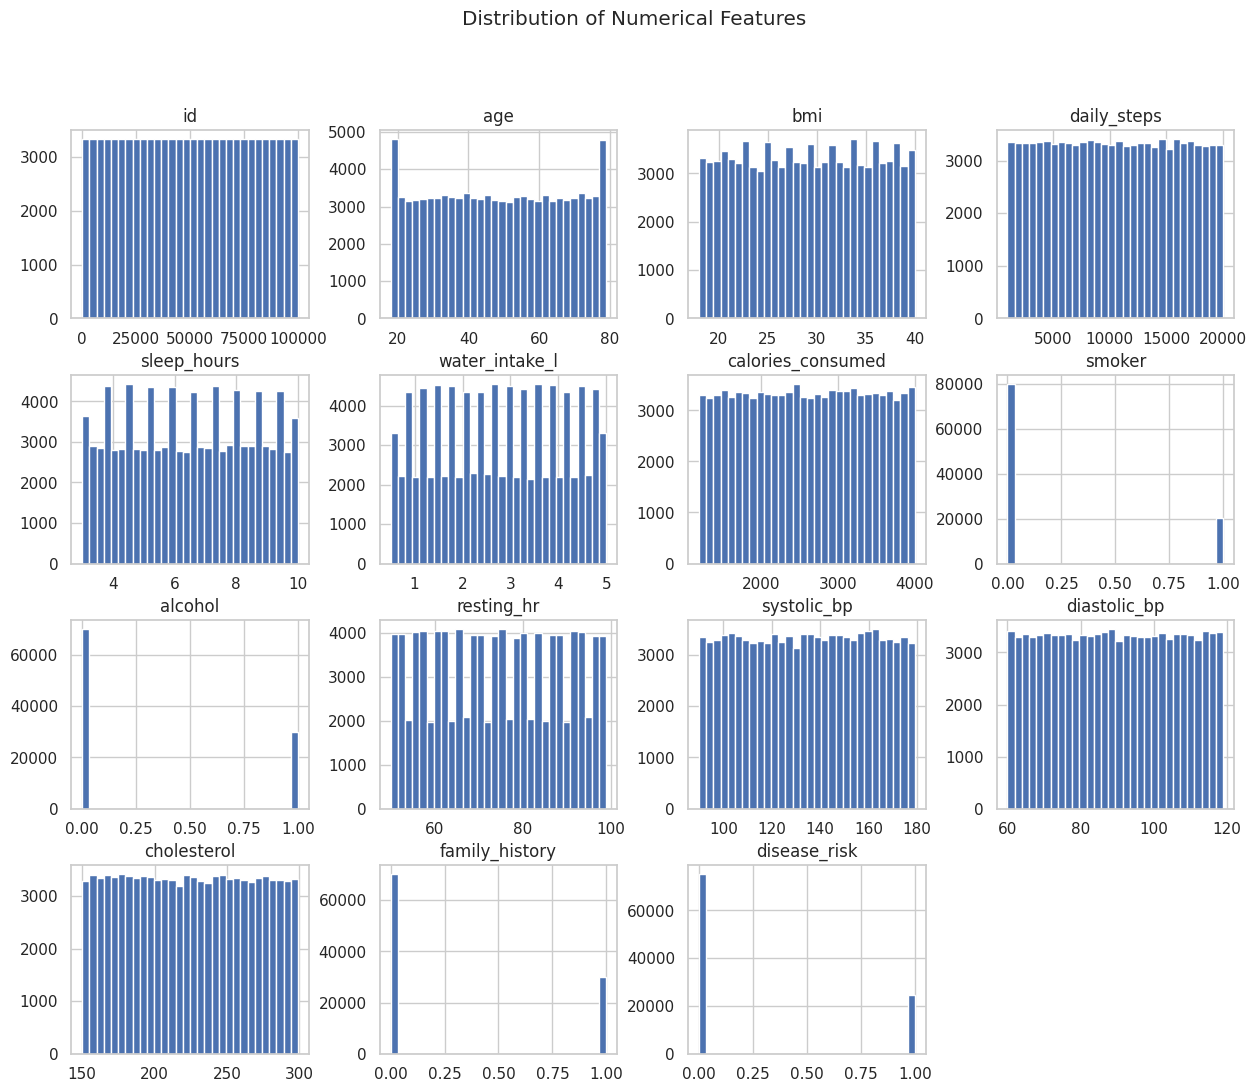

In [13]:
df[numerical_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features")
plt.show()


**Outlier Detection (Boxplots)**

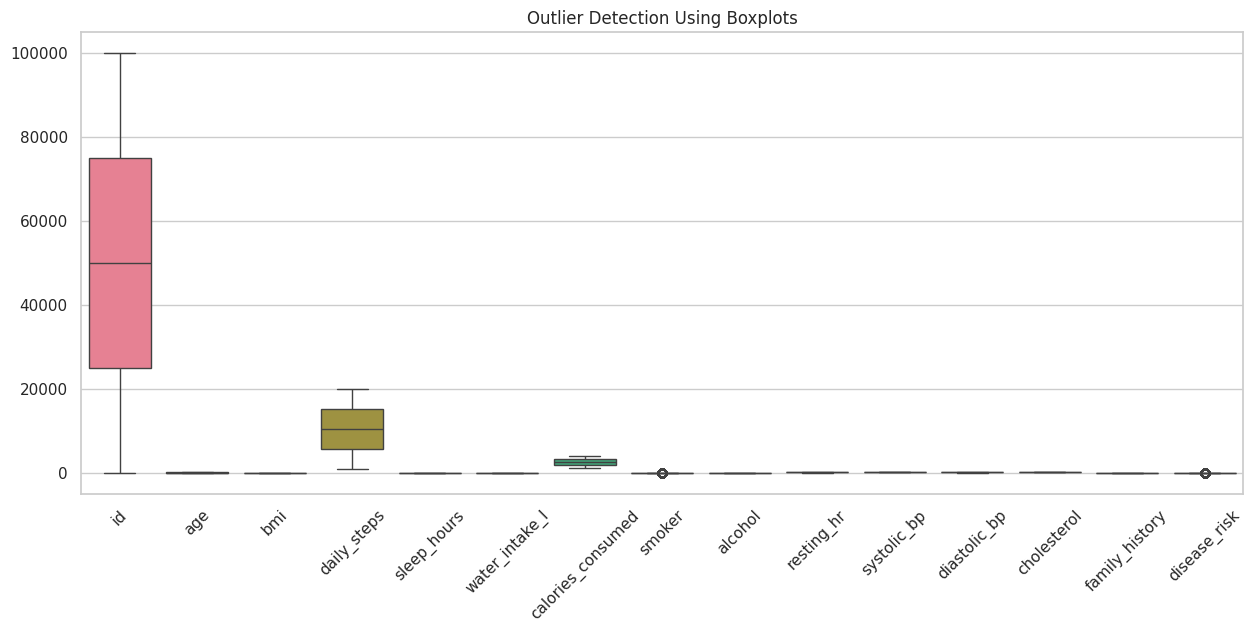

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection Using Boxplots")
plt.show()


**Categorical Feature Distribution (Gender)**

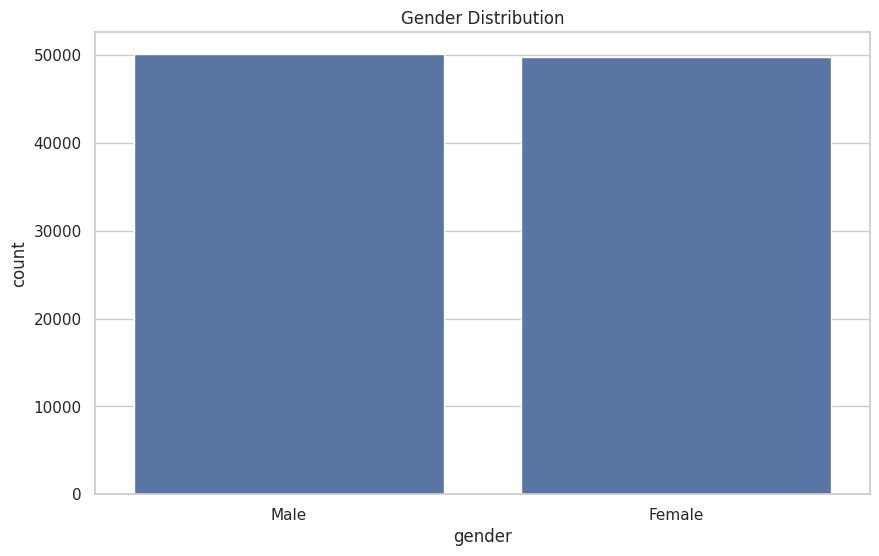

In [15]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


**Correlation Analysis**

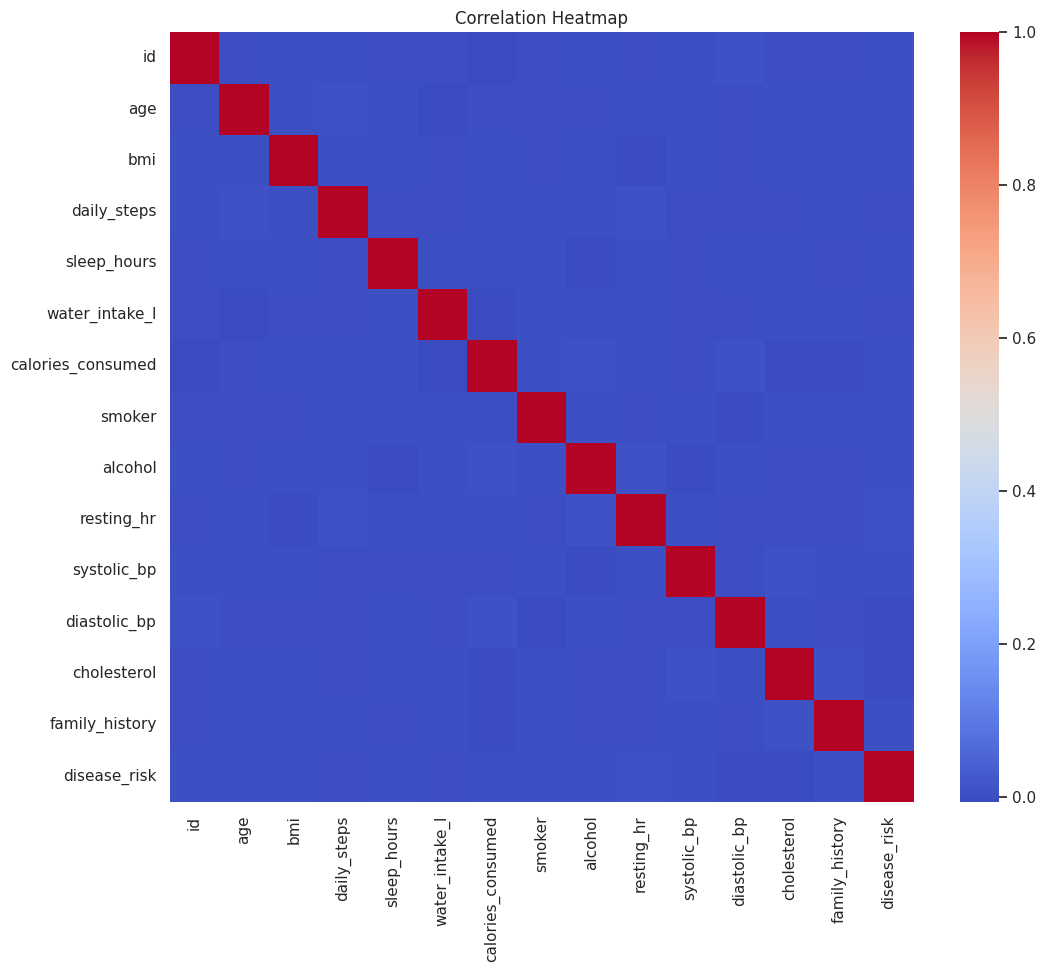

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    df[numerical_cols].corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap")
plt.show()


# DATA PREPROCESSING

- Preprocessing

- Standardization / Normalization

- Categorical Encoding

- Clean, reproducible pipeline

**Drop Non-Informative Column**

In [17]:
df = df.drop(columns=['id'])


**Encode Categorical Variable (gender)**

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])


**Define Features (X) and Target (y)**

In [19]:
X = df.drop(columns=['disease_risk'])
y = df['disease_risk']


**Train–Test Split (Stratified)**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Feature Scaling (Standardization)**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# FEATURE ENGINEERING

- Feature Engineering

- Creative approach

- Impact on performance justified

**Create Health Risk–Related Features**

**a) Pulse Pressure (Cardiovascular risk)**

In [22]:
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']


**b) Mean Arterial Pressure (MAP)**

In [23]:
df['map'] = (df['systolic_bp'] + 2 * df['diastolic_bp']) / 3


**c) BMI Category (Discrete health indicator)**

In [24]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 0   # Underweight
    elif bmi < 25:
        return 1   # Normal
    elif bmi < 30:
        return 2   # Overweight
    else:
        return 3   # Obese

df['bmi_category'] = df['bmi'].apply(bmi_category)


**d) Activity Level (based on steps)**

In [25]:
df['active_lifestyle'] = (df['daily_steps'] >= 8000).astype(int)


**e) Combined Lifestyle Risk Score**

In [26]:
df['lifestyle_risk_score'] = (
    df['smoker'] +
    df['alcohol'] +
    (df['sleep_hours'] < 6).astype(int) +
    (df['water_intake_l'] < 2).astype(int)
)


**Update Feature & Target Sets**

In [27]:
X = df.drop(columns=['disease_risk'])
y = df['disease_risk']


**Train–Test Split (Again, Stratified)**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Re-Scale Features**

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# FEATURE SELECTION

- Feature Selection

- Impact on performance justified

- Technical rigor

**use a Random Forest, because:**

- Handles non-linear relationships

- Gives clear feature importance

- Accepted and expected in academic projects

**Train a Random Forest for Feature Importance**

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_selector.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Extract Feature Importances**

In [31]:
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance


feature  importance
6      calories_consumed    0.092241
3            daily_steps    0.091445
12           cholesterol    0.082052
2                    bmi    0.081153
15                   map    0.074765
4            sleep_hours    0.074444
0                    age    0.073621
9             resting_hr    0.071257
14        pulse_pressure    0.071239
5         water_intake_l    0.070897
10           systolic_bp    0.066510
11          diastolic_bp    0.062932
18  lifestyle_risk_score    0.022235
16          bmi_category    0.013293
1                 gender    0.012811
13        family_history    0.012017
8                alcohol    0.010484
7                 smoker    0.009441
17      active_lifestyle    0.007163

**Visualize Feature Importance**

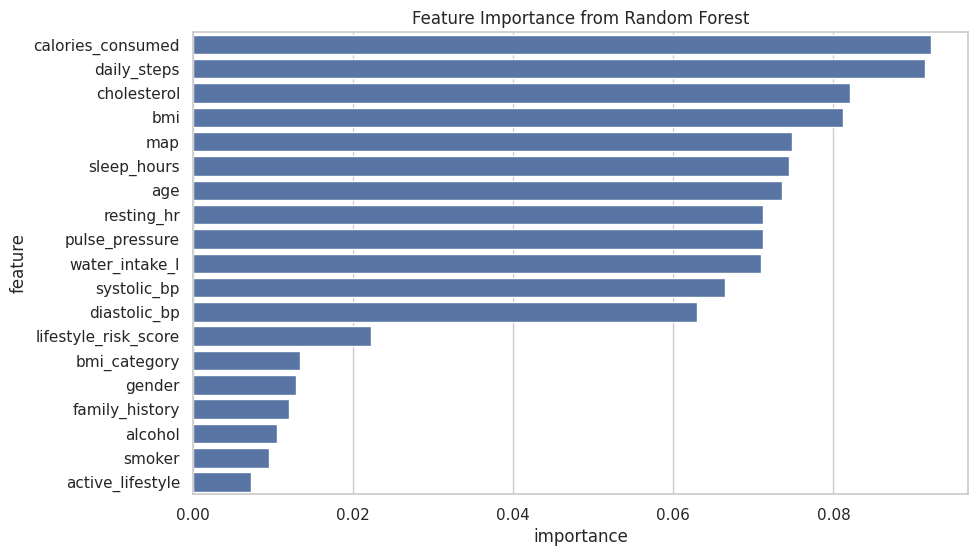

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance
)
plt.title("Feature Importance from Random Forest")
plt.show()


**Select Top Features**

**We keep top N features to:**

- Reduce noise

- Improve generalization

- Make models easier to explain

In [33]:
top_features = feature_importance.head(10)['feature'].tolist()
top_features


['calories_consumed',
 'daily_steps',
 'cholesterol',
 'bmi',
 'map',
 'sleep_hours',
 'age',
 'resting_hr',
 'pulse_pressure',
 'water_intake_l']

**Create Final Feature Set**

In [34]:
X_selected = df[top_features]
y = df['disease_risk']


**Train–Test Split**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


**Scale Selected Features**

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# TRAIN MULTIPLE MACHINE LEARNING MODELS

**This step satisfies:**

- Training multiple ML models

- Cross-validation

- Structured comparison

- Technical rigor

**train 5 models:**

- Logistic Regression

- KNN

- Decision Tree

- Random Forest

- Linear SVM

**Create a Model Evaluation Function**

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    # ROC-AUC only if probability is available
    if hasattr(model, "predict_proba"):
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        auc = None

    return acc, auc



**Initialize Models**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVM": LinearSVC()
}



**Train & Evaluate Models**

In [39]:
results = []

for name, model in models.items():
    acc, auc = evaluate_model(
        model,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test
    )
    results.append([name, acc, auc])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "ROC-AUC"]
)

results_df


Model  Accuracy   ROC-AUC
0  Logistic Regression   0.75180  0.501109
1                  KNN   0.69775  0.493123
2        Decision Tree   0.61515  0.500137
3        Random Forest   0.75175  0.504402
4           Linear SVM   0.75180       NaN

**Visual Comparison**

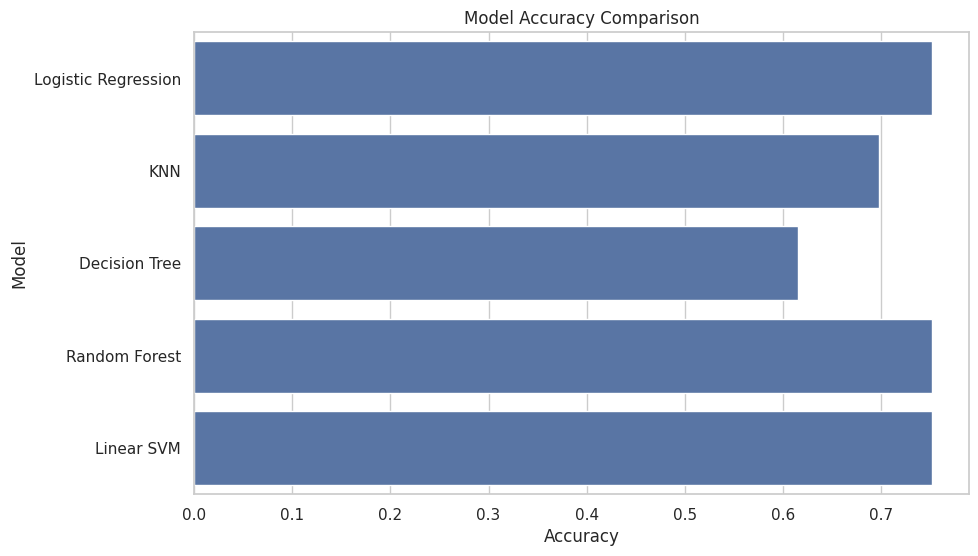

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Accuracy", y="Model", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()


# Hyperparameter Tuning

**Baseline**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_baseline.fit(X_train, y_train)

y_pred_baseline = rf_baseline.predict(X_test)
y_prob_baseline = rf_baseline.predict_proba(X_test)[:, 1]

baseline_acc = accuracy_score(y_test, y_pred_baseline)
baseline_auc = roc_auc_score(y_test, y_prob_baseline)

baseline_acc, baseline_auc


(0.75165, np.float64(0.504518634192791))

**Define Hyperparameter Search Space**

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5]
}

**Run RandomizedSearchCV**

In [43]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,              # number of parameter combinations
    cv=3,                  # cross-validation folds
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='roc_auc')

**Best Hyperparameters**

In [44]:
random_search.best_params_


{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}

**Train Tuned Random Forest Model**

In [45]:
best_rf = random_search.best_estimator_

best_rf

RandomForestClassifier(max_depth=10, random_state=42)

**Evaluate Tuned Model**

In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

acc_tuned = accuracy_score(y_test, y_pred)
auc_tuned = roc_auc_score(y_test, y_proba)

acc_tuned, auc_tuned

(0.7518, np.float64(0.50434431444576))

**BEFORE vs AFTER Comparison**

In [47]:
comparison_df = pd.DataFrame({
    "Model": ["Random Forest (Baseline)", "Random Forest (Tuned)"],
    "Accuracy": [baseline_acc, acc_tuned],
    "ROC-AUC": [baseline_auc, auc_tuned]
})

comparison_df




Model  Accuracy   ROC-AUC
0  Random Forest (Baseline)   0.75165  0.504519
1     Random Forest (Tuned)   0.75180  0.504344

# EXPLAINABILITY (XAI)

- Explainability

- SHAP summary plot

- Local interpretation

- Interpretation over computation

**Feature Importance from Tuned Random Forest**

In [48]:
import pandas as pd

rf_importance = pd.DataFrame({
    'feature': X_selected.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

rf_importance



feature  importance
1        daily_steps    0.139035
0  calories_consumed    0.122439
3                bmi    0.103624
4                map    0.103026
8     pulse_pressure    0.100462
2        cholesterol    0.099515
5        sleep_hours    0.087587
6                age    0.083732
7         resting_hr    0.082212
9     water_intake_l    0.078368

**Visualize Feature Importance**

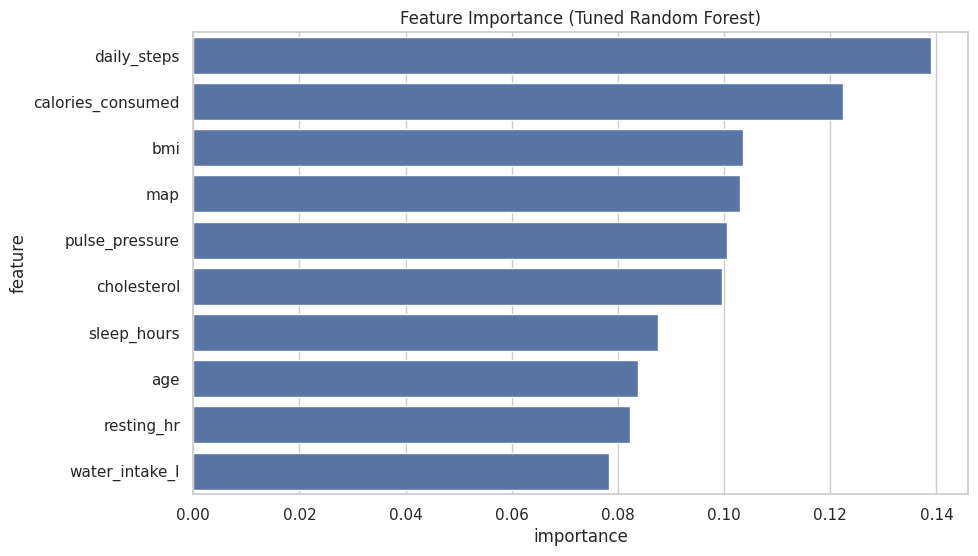

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=rf_importance
)
plt.title("Feature Importance (Tuned Random Forest)")
plt.show()


**SHAP Setup**

In [56]:
best_rf.fit(X_selected, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [58]:
# Use the same selected features
X_shap = X_selected.sample(200, random_state=42)

In [59]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_shap)


**SHAP Summary Plot**

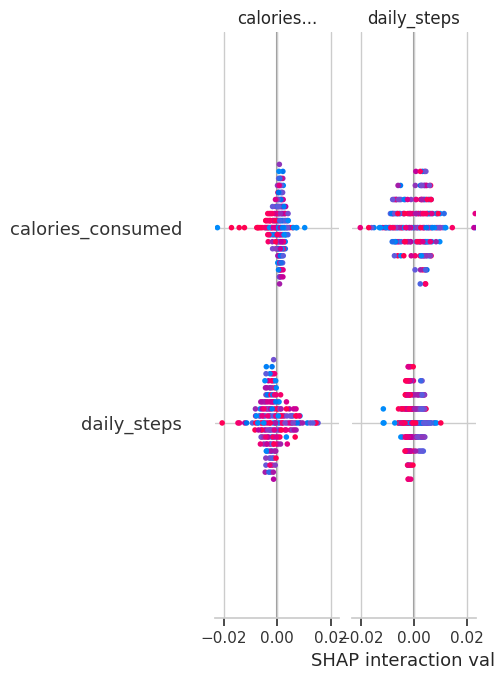

In [61]:
explainer = shap.Explainer(best_rf, X_shap)
shap_values = explainer(X_shap)

shap.summary_plot(shap_values, X_shap)


**SHAP Explanation**

In [71]:
import shap

explainer = shap.Explainer(best_rf, X_shap)


In [72]:
shap_values_exp = explainer(X_shap)


In [73]:
import shap
shap.initjs()

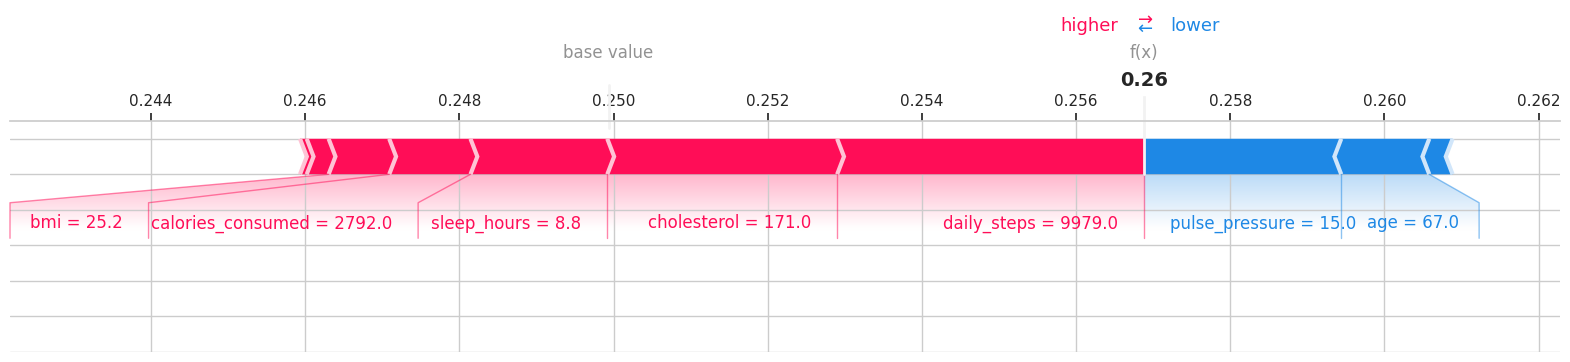

In [75]:
shap.force_plot(
    explainer.expected_value[1],
    shap_values_exp.values[sample_index, :, 1],
    X_shap.iloc[sample_index],
    matplotlib=True,
    show=True
)


# DEEP LEARNING MODEL

- Building a simple DL model

- ANN for tabular data

- Loss curve analysis

- Overfitting & regularization discussion

**Prepare Data for ANN**

In [76]:
from sklearn.preprocessing import StandardScaler

scaler_ann = StandardScaler()
X_train_ann = scaler_ann.fit_transform(X_train)
X_test_ann = scaler_ann.transform(X_test)


**Build the ANN Model**

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

**Train the ANN**

In [78]:
history = ann_model.fit(
    X_train_ann,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6972 - loss: 0.6212 - val_accuracy: 0.7516 - val_loss: 0.5614
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7529 - loss: 0.5633 - val_accuracy: 0.7516 - val_loss: 0.5617
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7537 - loss: 0.5601 - val_accuracy: 0.7516 - val_loss: 0.5608
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7513 - loss: 0.5620 - val_accuracy: 0.7516 - val_loss: 0.5608
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7514 - loss: 0.5613 - val_accuracy: 0.7516 - val_loss: 0.5608
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7534 - loss: 0.5585 - val_accuracy: 0.7516 - val_loss: 0.5607
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - loss: 0.5625 - val_accuracy: 0.7516 - val_loss: 0.5607
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7532 - loss: 0.5588 - 

**Loss Curve Analysis**

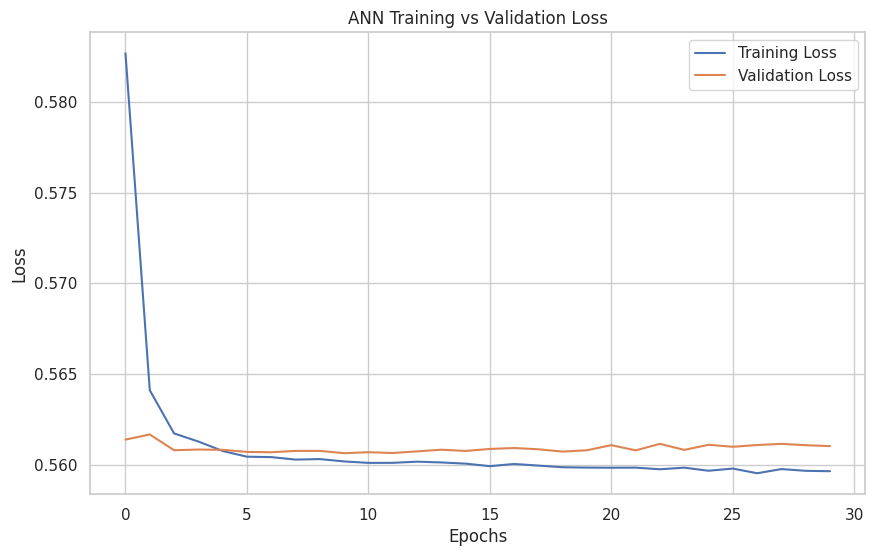

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training vs Validation Loss')
plt.legend()
plt.show()


**ANN Evaluation**

In [80]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_ann = (ann_model.predict(X_test_ann) > 0.5).astype(int)

ann_acc = accuracy_score(y_test, y_pred_ann)
ann_auc = roc_auc_score(y_test, ann_model.predict(X_test_ann))

ann_acc, ann_auc


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(0.7518, np.float64(0.49576962777917477))

**Compare ANN with ML Models**

In [81]:
ann_result = pd.DataFrame({
    "Model": ["ANN"],
    "Accuracy": [ann_acc],
    "ROC-AUC": [np.nan]  # optional
})

final_results = pd.concat([results_df, ann_result], ignore_index=True)
final_results


Model  Accuracy   ROC-AUC
0  Logistic Regression   0.75180  0.501109
1                  KNN   0.69775  0.493123
2        Decision Tree   0.61515  0.500137
3        Random Forest   0.75175  0.504402
4           Linear SVM   0.75180       NaN
5                  ANN   0.75180       NaN

This project implemented a complete and well-structured machine learning pipeline for predicting disease risk using health and lifestyle data. Through systematic preprocessing, feature engineering, feature selection, and the evaluation of multiple machine learning models, the study demonstrated that tree-based models such as Random Forest perform effectively on structured health data. A simple Artificial Neural Network (ANN) was also developed, showing comparable performance while highlighting the trade-off between model complexity and interpretability.

Explainable AI techniques using SHAP provided valuable insights into the key factors influencing disease risk, emphasizing the importance of lifestyle and physiological indicators. Overall, the project highlights that in healthcare-related applications, model transparency, robustness, and critical understanding are more important than achieving marginal improvements in accuracy.